In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [26]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
#TODO:
#Add more nodes - Exponential Distribution

In [28]:
class AggregationWrapper(object):
    def __init__(self, instance = 1):
        self.instance = random.sample(range(1000), instance)
        self.constant_k = 4
        self.constant_n = 500
        self.avg_deg = 13
        
    def graph_er(self, nodes):
        aspl_vals = []
        for n in nodes:
            p = 1.0 * self.avg_deg/(n-1)
            G = nx.fast_gnp_random_graph(n, p, seed=self.instance[0])
            aspl = nx.average_shortest_path_length(G)
            data = (n,p,aspl)
            aspl_vals.append(data)
        return aspl_vals
    
    def graph_wr_aggregation(self, pvalue):
        avger_dict_cluster = {}
        avger_dict_aspl = {}

        for i in self.instance:
            for p in pvalue:
                G1 = nx.watts_strogatz_graph(self.constant_n, self.constant_k, p, seed=i)
                avg_cluster = nx.average_clustering(G1)
                aspl = nx.average_shortest_path_length(G1)
                key = p
                value_c = avg_cluster
                value_aspl = aspl
                if key not in avger_dict_cluster:
                    avger_dict_cluster[key] = 1.0 * value_c/len(self.instance)
                    avger_dict_aspl[key] = 1.0 * value_aspl/len(self.instance)
                else:
                    avger_dict_cluster[key] += 1.0 * value_c/len(self.instance)
                    avger_dict_aspl[key] += 1.0 * value_aspl/len(self.instance)
                    
        ds = [avger_dict_cluster, avger_dict_aspl]
        d = {}
        for k in avger_dict_cluster.iterkeys():
            d[k] = tuple(d[k] for d in ds)
        
        return d

In [29]:
nodes = [70,100,500,1000,4000,6000]
nodes_small = [70,100,250, 500, 600, 800, 1000]

In [30]:
av = AggregationWrapper()
plot_data = av.graph_er(nodes_small)

In [31]:
x = []
y = []
for i in range(0,len(plot_data)):
    x.append(plot_data[i][0])
    y.append(plot_data[i][2])
    

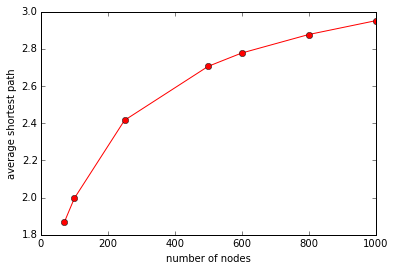

In [32]:
plt.plot(x, y,'ro-')
plt.xlabel('number of nodes')
plt.ylabel('average shortest path')

In [33]:
# Part 2

In [34]:
p_val = [0, 0.0001, 0.004, 0.008,0.002, 0.003, 0.001, 0.01, 0.9, 0.4, 0.1, 1]

In [35]:
av1 = AggregationWrapper(7)
data1 = av1.graph_wr_aggregation(p_val)
plot_data1 = data1.items()

In [36]:
x1 = []
y1 = []
z1 = []
for i in range(0,len(plot_data1)):
    x1.append(plot_data1[i][0])
    y1.append(plot_data1[i][1][0])
    z1.append(plot_data1[i][1][1])

y1 = map(lambda x : x/y1[0], y1)
z1 = map(lambda x : x/z1[0], z1)

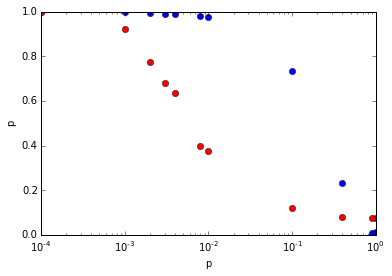

In [37]:
m = plt.plot(x1, y1,'bo')
m = plt.plot(x1, z1,'ro')
plt.xscale('log')
plt.xlabel('p')
plt.ylabel('p')